In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import os

In [5]:
model_folder = '/home/ubuntu/epilepsy_project/Models/'
model_name = 'full_montage_MGH_PSG_OG_no_flip'
path_model = os.path.join(model_folder,model_name)

In [7]:
# load dataframes with predictions and labels
import os
# get prediction dataframe from Backstage/Model_name
bonobo_pred = pd.read_csv(path_model+'/bonobo_pred.csv')
# get labels dataframe from Judge
path_bonobo_labels = os.path.join('..','Tables','testset_bonobo_events.csv')
bonobo_labels = pd.read_csv(path_bonobo_labels)


In [9]:
# merge bonobo_pred and bonobo_labels on 'event_file'
bonobo_all = bonobo_labels.merge(bonobo_pred, on='event_file', how='left')

# only look at samples rated by > 8 people
ultra_quality_filter = bonobo_all['total_votes_received']>=8
# only look at samples rated rated strong agreement
frac_filter = (bonobo_all['fraction_of_yes'] > 6/8) | (bonobo_all['fraction_of_yes'] < 2/8)

bonobo_all = bonobo_all[ultra_quality_filter & frac_filter]

In [10]:
# extract labels and predictions
labels = bonobo_all.fraction_of_yes.round(0).astype(int)
preds = bonobo_all.preds.values

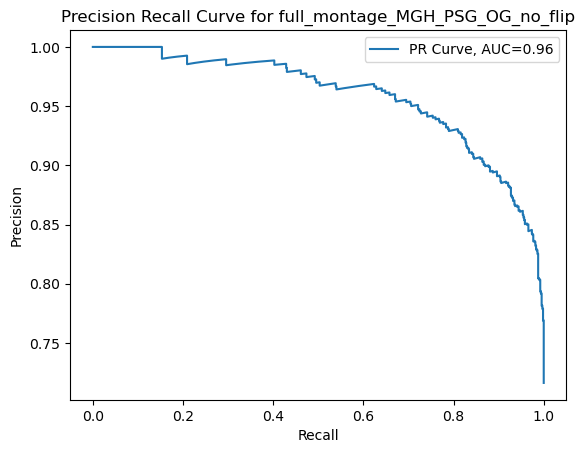

In [11]:

precision, recall, thresholds = precision_recall_curve(labels, preds)

pr_auc = average_precision_score(labels, preds)
plt.plot(recall, precision,label="PR Curve, AUC="+str(np.round(pr_auc,2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Recall Curve for '+model_name)
plt.savefig(path_model+'/Results/PR_AUC.png')

In [12]:
# write brier score to text file
with open(path_model+'/Results/results.txt', 'a') as f:
    f.write('PR AUC: '+str(pr_auc)+'\n')